## Appendix C

In [ ]:
!pip3 install numpy opencv-python matplotlib scikit-learn pandas

In [2]:
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Read face image from zip file
faces = dict()
with zipfile.ZipFile("../assets/40_people_faces.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # we use OpenCV to decode the byte string into an array of pixels
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

File naming ex1: s1/1.pgm
File naming ex2: s1/10.pgm
File naming ex3: s1/2.pgm




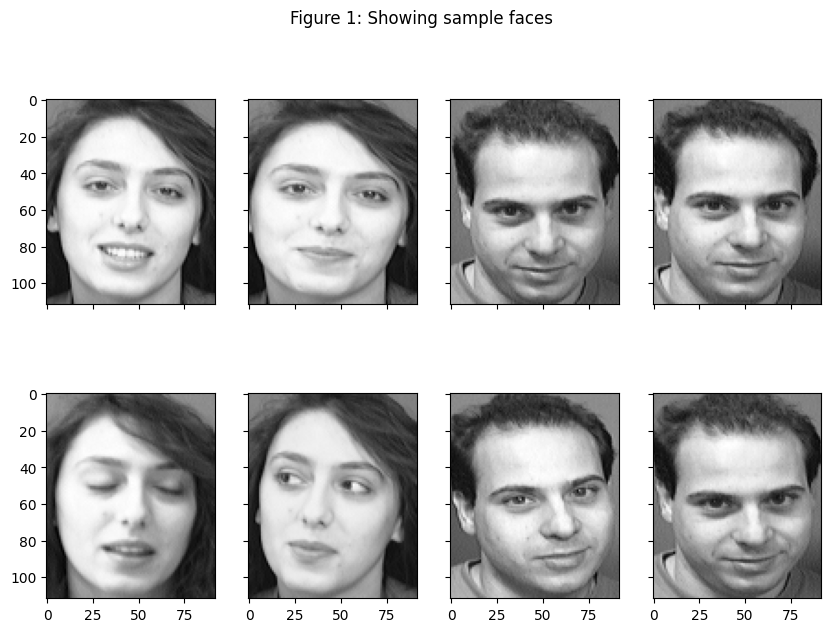

Face image shape: (112, 92)


In [4]:
# Show sample faces using matplotlib
img_number = 8
offset = 6

# showing the structure of the files
print("File naming ex1:", list(faces.keys())[0])
print("File naming ex2:", list(faces.keys())[1])
print("File naming ex3:", list(faces.keys())[2])
print('\n')

fig, axes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(10,7))
# take last N of images
face_images = list(faces.values())[-img_number-offset:-offset]

for i in range(img_number):
    axes[i%2][i//2].imshow(face_images[i], cmap="gray")

plt.suptitle('Figure 1: Showing sample faces')
plt.show()

# Print the pixel size of each picture
face_shape = list(faces.values())[0].shape
print("Face image shape:", face_shape)

In [5]:
# Separate images of 1-39 person and  eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
face_matrix = list()
person_face_label = list()
for key, val in faces.items():
    if key.startswith("s1/"):
        continue # this is our test set
    if key == "s28/10.pgm":
        continue # this is our test set
    face_matrix.append(val.flatten()) # save the images
    person_face_label.append(key.split("/")[0]) # save only the person number

# Create a NxM matrix with N images and M pixels per image
print('\n\t\tFigure 2: Matrix Representation of the Images\n')
face_matrix = np.array(face_matrix)
print(pd.DataFrame(face_matrix))



		Figure 2: Matrix Representation of the Images

     0      1      2      3      4      5      6      7      8      9      \
0      140    134    135    136    133    136    133    134    136    137   
1      133    129    133    130    130    132    129    132    128    133   
2      138    135    135    138    136    135    135    136    135    136   
3      137    135    136    136    136    138    136    126    139    128   
4      132    118    124    129    133    138    135    132    142    126   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
384    110    109    111    107    116    113    111    111    113    114   
385    113    112    111    113    115    115    111    114    115    114   
386    112    109    116    112    113    113    115    114    114    116   
387    111    114    112    112    110    112    111    114    112    112   
388    110    112    113    109    113    110    114    111    111    115   

     ...  10294  10295  1

       0         1         2         3         4         5         6      \
0  -0.002025 -0.002047 -0.002019 -0.002002 -0.001878 -0.001686 -0.001372   
1   0.015544  0.015452  0.015517  0.015619  0.015571  0.015583  0.015573   
2   0.018638  0.018762  0.018561  0.018694  0.018634  0.018746  0.019277   
3  -0.011755 -0.011815 -0.011591 -0.011389 -0.011622 -0.011696 -0.011330   
4  -0.004857 -0.005049 -0.005096 -0.004774 -0.005107 -0.004821 -0.005108   
5  -0.001479 -0.000744 -0.000866 -0.000981 -0.001078 -0.001052 -0.000905   
6   0.011054  0.011099  0.010757  0.010985  0.010513  0.010691  0.010460   
7  -0.004435 -0.004779 -0.004883 -0.004202 -0.004709 -0.004276 -0.004457   
8  -0.001090 -0.001529 -0.001314 -0.001289 -0.001002 -0.000709 -0.000314   
9   0.004587  0.004715  0.004786  0.004810  0.004709  0.004689  0.004292   
10 -0.008347 -0.008331 -0.007909 -0.008578 -0.008067 -0.008598 -0.008166   
11  0.007849  0.007850  0.008453  0.008018  0.007757  0.008276  0.008188   
12 -0.008063

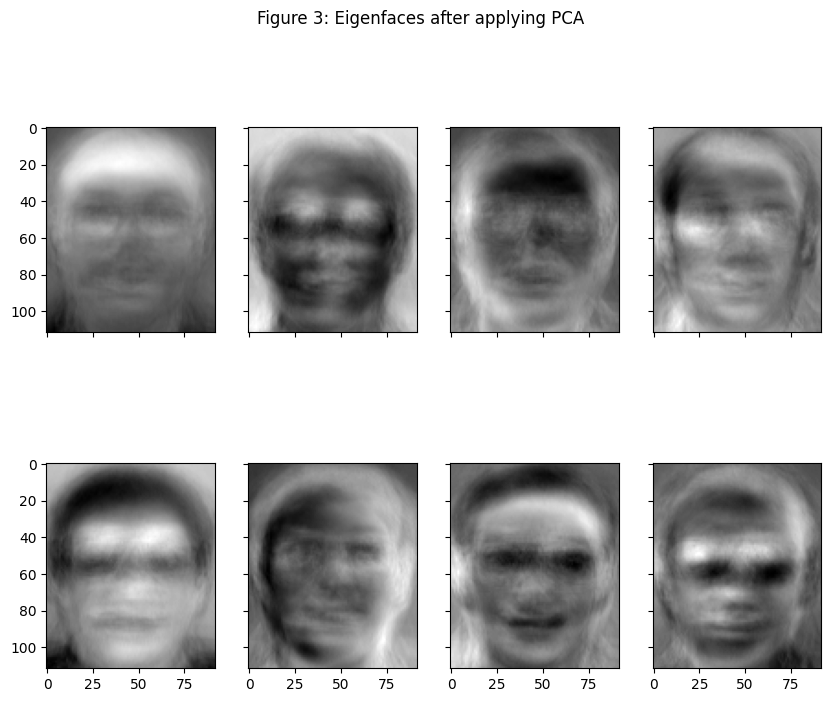

In [18]:
# Apply PCA, where each row represent an eigenvector/eigenface
# taking the first 50 eigenvectors (PC) with the highest eigenvalues


num_pc = 50
pca = PCA().fit(face_matrix)
eigenfaces = pca.components_[:num_pc]

# pca = PCA(n_components=num_pc).fit(face_matrix)
# eigenfaces = pca.components_

egvec = np.array(eigenfaces)
print(pd.DataFrame(egvec))

# Show the first 8 eigenfaces/eigenvectors
fig, axes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(10,8))
for i in range(img_number):
    axes[i%(img_number//4)][i//(img_number//4)].imshow(
      eigenfaces[i].reshape(face_shape),
      cmap="gray")

plt.suptitle("Figure 3: Eigenfaces after applying PCA")
plt.show()



In [7]:
# printing the variance matrix (eigenvalues of each eigenvectors/principal component)

print('\n\t\tFigure 4: Variance Matrix\n')
print(pd.DataFrame(pca.explained_variance_ratio_))


		Figure 4: Variance Matrix

           0
0   0.170781
1   0.132518
2   0.069736
3   0.053070
4   0.050693
5   0.033911
6   0.024883
7   0.023752
8   0.020062
9   0.017830
10  0.014754
11  0.014275
12  0.011166
13  0.010764
14  0.009979
15  0.009306
16  0.008745
17  0.008438
18  0.007302
19  0.007058
20  0.006569
21  0.006346
22  0.005992
23  0.005488
24  0.005426
25  0.005067
26  0.004875
27  0.004652
28  0.004542
29  0.004446
30  0.004421
31  0.004087
32  0.003986
33  0.003775
34  0.003632
35  0.003528
36  0.003465
37  0.003337
38  0.003238
39  0.003042
40  0.002980
41  0.002922
42  0.002823
43  0.002733
44  0.002680
45  0.002622
46  0.002556
47  0.002471
48  0.002402
49  0.002345


In [25]:
# calculate the weight vector for each input picture and save it in
# 'weights' as a KxN matrix, where K is the number of eigenfaces and N
# the number of samples
weights = eigenfaces @ (face_matrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

print(pca.mean_.shape)

ddd = np.array(weights)
print(pd.DataFrame(weights))

Shape of the weight matrix: (50, 389)
(10304,)
            0            1            2            3            4    \
0  -2496.384897  -141.071028 -2326.499292 -2242.133423 -2015.700350   
1    880.841113  2013.746243  1273.288766  1427.991145  1342.838289   
2    -57.144280 -1692.919980  -720.780266  -850.237935  -632.795844   
3  -2138.209432 -1043.289627 -1624.803489  -713.199730  -559.289038   
4   -214.589448 -1602.808413  -769.036932  -702.357239  -458.326021   
5  -1838.000027  -143.767531 -1459.901511 -1207.680420  -812.316427   
6    -74.466677   434.562152  -271.639987  -140.051938  -106.788265   
7   1111.966009  -646.515065  1375.350826  1357.990610  1097.639257   
8   -267.649547  -578.595458  -612.985305  -406.577780  -268.539980   
9    584.209463  -111.522611   911.605200  1193.617050  1192.811916   
10  -963.604281  -249.067181  -500.041739  -881.083945  -841.437204   
11   642.871629   807.758241   648.170891   790.647889   580.426181   
12   975.580241    60.083529  

Best match s28 with Euclidean distance 1890.163920


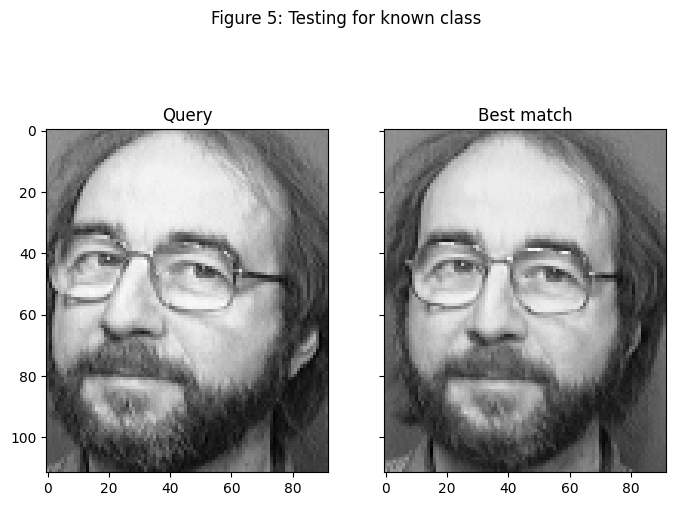

In [9]:
# Test on out-of-sample image of existing class
query = faces["s28/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (person_face_label[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(face_shape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(face_matrix[best_match].reshape(face_shape), cmap="gray")
axes[1].set_title("Best match")

plt.suptitle('Figure 5: Testing for known class')
plt.show()

Best match s13 with Euclidean distance 3645.584803


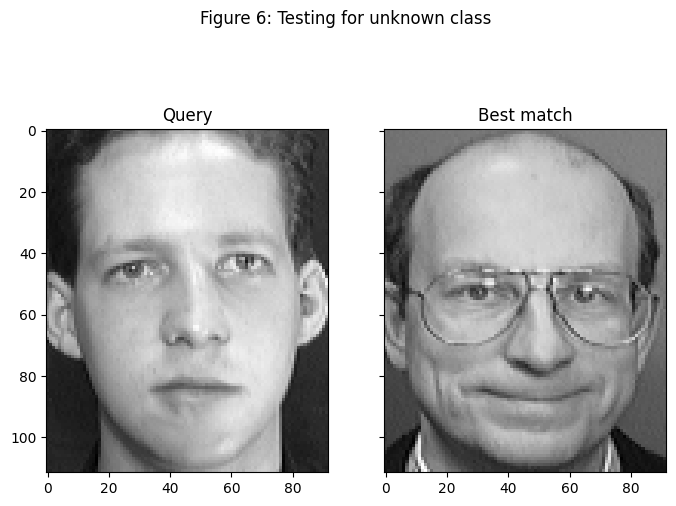

In [10]:
# Test on out-of-sample image of new class
query = faces["s1/8.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (person_face_label[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(face_shape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(face_matrix[best_match].reshape(face_shape), cmap="gray")
axes[1].set_title("Best match")

plt.suptitle('Figure 6: Testing for unknown class')
plt.show()